Data Shapes: (866, 20, 1) (186, 20, 1) (186, 20, 1)
Epoch 1/15


C:\Users\myash\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - loss: 0.0253 - val_loss: 0.0045
Epoch 2/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0050 - val_loss: 0.0052
Epoch 3/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0033 - val_loss: 0.0038
Epoch 4/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0031 - val_loss: 0.0036
Epoch 5/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0029 - val_loss: 0.0037
Epoch 6/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0022 - val_loss: 0.0035
Epoch 7/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 8/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0028 - val_loss: 0.0030
Epoch 9/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0022 - val_loss: 0.0030
Epoch 10/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0055 - val_loss: 0.0037
Epoch 11/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0053 - val_loss: 0.0032
Epoch 12/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0020 - val_l

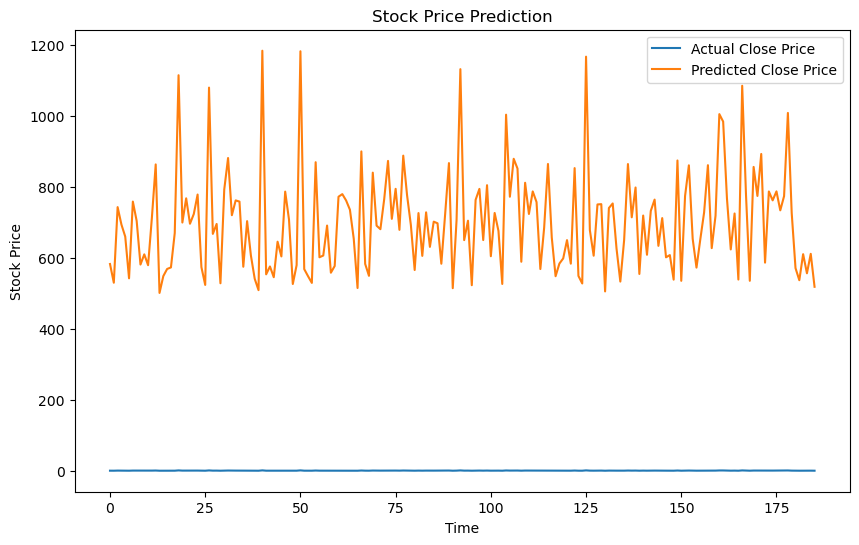

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

# Load dataset
data = pd.read_csv(r"C:/Users/myash/Downloads/Google_Stock_Price_Train.csv")  # Replace with your dataset path

# Check for missing values in 'Close' and handle them
if data['Close'].isnull().any():
    data['Close'].fillna(method='ffill', inplace=True)  # Forward fill to handle missing values

# Convert 'Close' to float if it's not
data['Close'] = data['Close'].str.replace(',', '').astype(float)

# Select relevant columns (e.g., 'Close' price)
prices = data['Close'].values

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(prices.reshape(-1, 1))

# Create sequences
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

sequence_length = 20  # Use last 20 days to predict the next day
X, y = create_sequences(scaled_data, sequence_length)

# Train-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Data Shapes:", X_train.shape, X_val.shape, X_test.shape)

# Building the Model
model = Sequential([
    GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    GRU(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_val, y_val))

# Predictions for visualization
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Inverse transform to get actual value

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Close Price')
plt.plot(predictions, label='Predicted Close Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Epoch 1/20


C:\Users\myash\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - loss: 0.0720 - val_loss: 0.0109
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0082 - val_loss: 0.0048
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0038 - val_loss: 0.0046
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0029 - val_loss: 0.0045
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0029 - val_loss: 0.0045
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0020 - val_loss: 0.0045
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0034 - val_loss: 0.0040
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0030 - val_loss: 0.0040
Epoch 9/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0023 - val_loss: 0.0037
Epoch 10/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0021 - val_loss: 0.0036
Epoch 11/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0020 - val_loss: 0.0038
Epoch 12/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0034 - val_

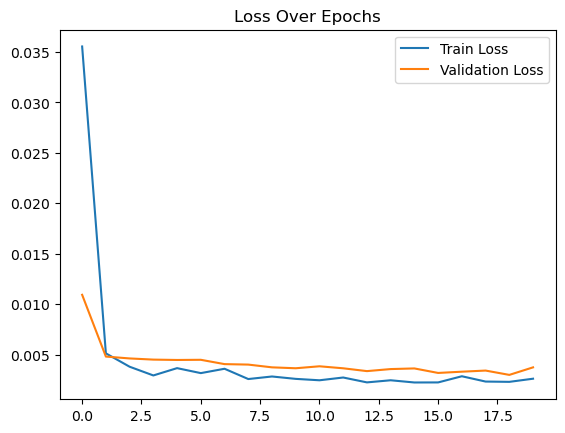

In [4]:
# Build GRU Model
def build_gru_model(units, dropout_rate, optimizer):
    model = Sequential()
    model.add(GRU(units=units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(GRU(units=units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Output layer for price prediction
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Hyperparameters
units = 50
dropout_rate = 0.2
optimizer = 'adam'

# Build and train the model
gru_model = build_gru_model(units, dropout_rate, optimizer)
history = gru_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    verbose=1
)

# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()


In [5]:
from sklearn.model_selection import ParameterGrid

# Define hyperparameter grid
param_grid = {
    'units': [50, 100],
    'dropout_rate': [0.2, 0.3],
    'optimizer': ['adam', 'rmsprop']
}

# Perform grid search
best_model = None
best_loss = float('inf')
best_params = {}

for params in ParameterGrid(param_grid):
    print(f"Testing parameters: {params}")
    model = build_gru_model(params['units'], params['dropout_rate'], params['optimizer'])
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=10,  # Use fewer epochs for tuning
        batch_size=32,
        verbose=0
    )
    val_loss = min(history.history['val_loss'])
    print(f"Validation Loss: {val_loss}")
    
    if val_loss < best_loss:
        best_loss = val_loss
        best_model = model
        best_params = params

print(f"Best Parameters: {best_params}")


Testing parameters: {'dropout_rate': 0.2, 'optimizer': 'adam', 'units': 50}
Validation Loss: 0.0036340600345283747
Testing parameters: {'dropout_rate': 0.2, 'optimizer': 'adam', 'units': 100}
Validation Loss: 0.0028223537374287844
Testing parameters: {'dropout_rate': 0.2, 'optimizer': 'rmsprop', 'units': 50}
Validation Loss: 0.004560153465718031
Testing parameters: {'dropout_rate': 0.2, 'optimizer': 'rmsprop', 'units': 100}
Validation Loss: 0.0033886260353028774
Testing parameters: {'dropout_rate': 0.3, 'optimizer': 'adam', 'units': 50}
Validation Loss: 0.0034932296257466078
Testing parameters: {'dropout_rate': 0.3, 'optimizer': 'adam', 'units': 100}
Validation Loss: 0.0029791558627039194
Testing parameters: {'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'units': 50}
Validation Loss: 0.004045291803777218
Testing parameters: {'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'units': 100}
Validation Loss: 0.0034943409264087677
Best Parameters: {'dropout_rate': 0.2, 'optimizer': 'adam', 'units

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step


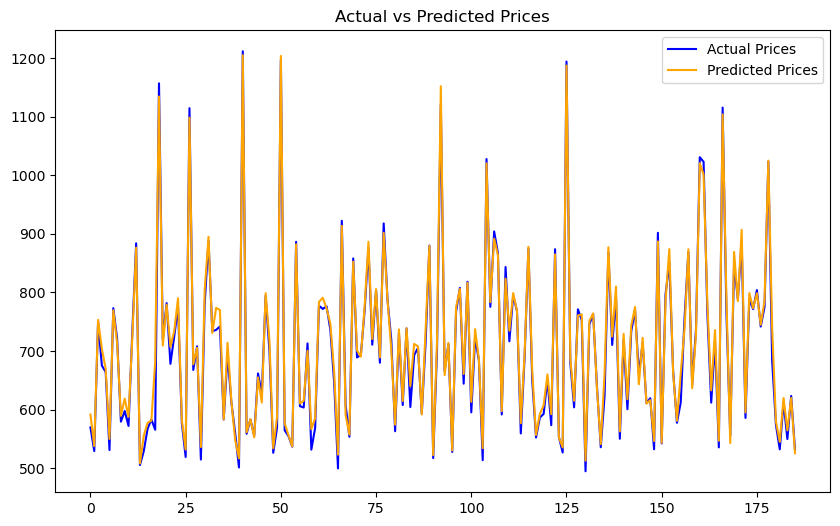

Test RMSE: 16.742637987255844


In [6]:
# Evaluate on test data
test_predictions = best_model.predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Prices', color='blue')
plt.plot(test_predictions, label='Predicted Prices', color='orange')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

# Calculate RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test_actual, test_predictions))
print(f"Test RMSE: {rmse}")
